# Using as a basemap

In response to https://github.com/MatthewDaws/TileMapBase/issues/1

### How to plot shapes

Unlike `basemap`, TileMapBase doesn't provide it's own plotting interface, but just draws tiles into a normal `matplotlib` axes.  So anything you can do in `matplotlib` you can continue to do, while remembering:

- You must use the correct coordinate system, which is "Web Mercator"
- This is described in the Projections.ipynb notebook
- But we provide a way to project from longitude and latitude, so you don't need to know the details.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tilemapbase

tilemapbase.init(create=True)

In [32]:
# Define the `extent`

my_office = (-1.554934, 53.804198)

degree_range = 0.003
extent = tilemapbase.Extent.from_lonlat(my_office[0] - degree_range, my_office[0] + degree_range,
                  my_office[1] - degree_range, my_office[1] + degree_range)
extent = extent.to_aspect(1.0)
extent

Extent((0.4956724055555556,0.3219964662575393)->(0.49568907222222225,0.32201313292420597) projected as normal)

In [33]:
# The path to plot

longs = [-1.554934, -1.555, -1.5552, -1.554]
lats = [53.804198, 53.80416, 53.8041, 53.8042]

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(longs, lats)]
x, y = zip(*path)

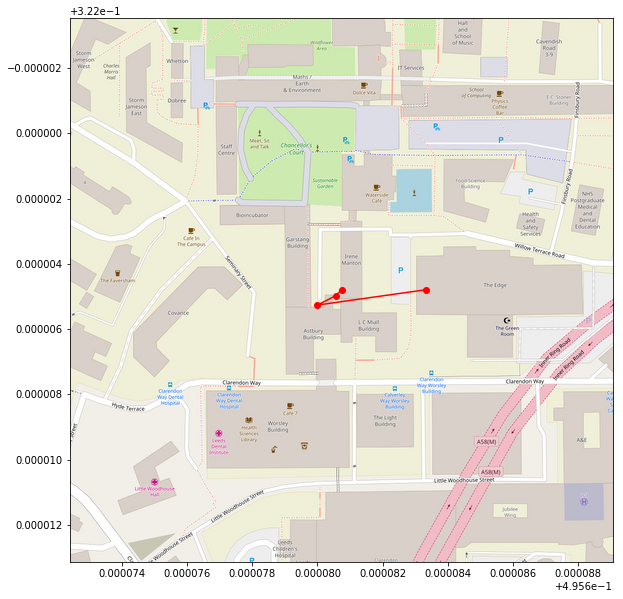

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(headers={'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}), width=600)
plotter.plot(ax)
ax.plot(x, y, "ro-")

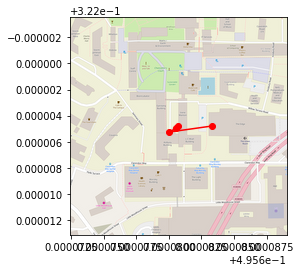

In [35]:
# Or using the plt interface

plotter.plot(plt.axes())
plt.plot(x,y, "ro-")